#C23-PC669 Capstone Project
## Bugiene
A Machine Learning Model implied computer vision using Convolutional Neural Network for classifying or predicting certain fruits into Rotten or Fresh categories. 

## Mount to drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Required Library




In [3]:
import os
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras.utils as image

In [4]:

print(tf.__version__)

2.12.0


##Extract Dataset



In [5]:
local_zip = '/content/drive/MyDrive/dataset/bugienev2.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')

zip_ref.close()

## Split Dataset to Train, Test and Validation

In [6]:
def make_dir(PATH):
  if not os.path.exists(PATH):
    os.mkdir(PATH)
    return PATH
  else:
    shutil.rmtree(PATH)
    os.mkdir(PATH)
    return PATH

In [7]:
try:
    base_dir = '/tmp'
    fruit_dir = make_dir(os.path.join(base_dir, 'fruit-dataset'))
    train_dir = make_dir(os.path.join(fruit_dir, 'train'))
    validation_dir = make_dir(os.path.join(fruit_dir, 'val'))
    test_dir = make_dir(os.path.join(fruit_dir, 'test'))
    preview_dir = make_dir(os.path.join(fruit_dir, 'preview'))

    train_fresh_dir = make_dir(os.path.join(train_dir, 'Fresh Fruit'))
    train_rotten_dir = make_dir(os.path.join(train_dir, 'Rotten Fruit'))

    validation_fresh_dir = make_dir(os.path.join(validation_dir, 'Fresh Fruit'))
    validation_rotten_dir = make_dir(os.path.join(validation_dir, 'Rotten Fruit'))

    test_fresh_dir = make_dir(os.path.join(test_dir, 'Fresh Fruit'))
    test_rotten_dir = make_dir(os.path.join(test_dir, 'Rotten Fruit'))

except OSError:
    pass

In [8]:
from PIL import Image

def split_data(SOURCE='', TRAINING='', VALIDATION='', SPLIT_SIZE=0):
  data = os.listdir(SOURCE)
  random_data = random.sample(data, len(data))

  train_size = len(data)*SPLIT_SIZE

  for i, filename in enumerate(random_data):
    filepath = os.path.join(SOURCE, filename)
    if os.path.getsize(filepath) > 0:
      if i < train_size:
        copyfile(filepath, os.path.join(TRAINING, filename))
      else:
        copyfile(filepath, os.path.join(VALIDATION, filename))

In [9]:
dataset_train_dir = '/tmp/dataset/train'
dataset_test_dir = '/tmp/dataset/test'

fapples_train_dir = os.path.join(dataset_train_dir, 'freshapples')
favocados_train_dir = os.path.join(dataset_train_dir, 'freshavocado')
fbananas_train_dir = os.path.join(dataset_train_dir, 'freshbanana')
fgrapes_train_dir = os.path.join(dataset_train_dir, 'freshgrape')
fguavas_train_dir = os.path.join(dataset_train_dir, 'freshguava')
foranges_train_dir = os.path.join(dataset_train_dir, 'freshoranges')



rapples_train_dir = os.path.join(dataset_train_dir, 'rottenapples')
ravocados_train_dir = os.path.join(dataset_train_dir, 'rottenavocado')
rbananas_train_dir = os.path.join(dataset_train_dir, 'rottenbanana')
rgrapes_train_dir = os.path.join(dataset_train_dir, 'rottengrape')
rguavas_train_dir = os.path.join(dataset_train_dir, 'rottenguava')
roranges_train_dir = os.path.join(dataset_train_dir, 'rottenoranges')

fapples_test_dir = os.path.join(dataset_test_dir, 'freshapples')
favocados_test_dir = os.path.join(dataset_test_dir, 'freshavocado')
fbananas_test_dir = os.path.join(dataset_test_dir, 'freshbanana')
fgrapes_test_dir = os.path.join(dataset_test_dir, 'freshgrape')
fguavas_test_dir = os.path.join(dataset_test_dir, 'freshguava')
foranges_test_dir = os.path.join(dataset_test_dir, 'freshoranges')
rapples_test_dir = os.path.join(dataset_test_dir, 'rottenapples')
ravocados_test_dir = os.path.join(dataset_test_dir, 'rottenavocado')
rbananas_test_dir = os.path.join(dataset_test_dir, 'rottenbanana')
rgrapes_test_dir = os.path.join(dataset_test_dir, 'rottengrape')
rguavas_test_dir = os.path.join(dataset_test_dir, 'rottenguava')
roranges_test_dir = os.path.join(dataset_test_dir, 'rottenoranges')

print('fapples_train images = ', len(os.listdir(fapples_train_dir)))
print('favocados_train images = ', len(os.listdir(favocados_train_dir)))
print('fbananas_train images = ', len(os.listdir(fbananas_train_dir)))
print('fgrapes_train images = ', len(os.listdir(fgrapes_train_dir)))
print('fguavas_train images = ', len(os.listdir(fguavas_train_dir)))
print('foranges_train images = ', len(os.listdir(foranges_train_dir)))
print('rapples_train images = ', len(os.listdir(rapples_train_dir)))
print('ravocados_train images = ', len(os.listdir(ravocados_train_dir)))
print('rbananas_train images = ', len(os.listdir(rbananas_train_dir)))
print('rgrapes_train images = ', len(os.listdir(rgrapes_train_dir)))
print('rguavas_train images = ', len(os.listdir(rguavas_train_dir)))
print('roranges_train images = ', len(os.listdir(roranges_train_dir)))
print()
print('fapples_test images = ', len(os.listdir(fapples_test_dir)))
print('favocados_test images = ', len(os.listdir(favocados_test_dir)))
print('fbananas_test images = ', len(os.listdir(fbananas_test_dir)))
print('fgrapes_test images = ', len(os.listdir(fgrapes_test_dir)))
print('fguavas_test images = ', len(os.listdir(fguavas_test_dir)))
print('foranges_test images = ', len(os.listdir(foranges_test_dir)))
print('rapples_test images = ', len(os.listdir(rapples_test_dir)))
print('ravocados_test images = ', len(os.listdir(ravocados_test_dir)))
print('rbananas_test images = ', len(os.listdir(rbananas_test_dir)))
print('rgrapes_test images = ', len(os.listdir(rgrapes_test_dir)))
print('rguavas_test images = ', len(os.listdir(rguavas_test_dir)))
print('roranges_test images = ', len(os.listdir(roranges_test_dir)))

fapples_train images =  1693
favocados_train images =  292
fbananas_train images =  1581
fgrapes_train images =  800
fguavas_train images =  1152
foranges_train images =  1466
rapples_train images =  2342
ravocados_train images =  494
rbananas_train images =  2224
rgrapes_train images =  700
rguavas_train images =  1129
roranges_train images =  1595

fapples_test images =  395
favocados_test images =  86
fbananas_test images =  381
fgrapes_test images =  660
fguavas_test images =  197
foranges_test images =  388
rapples_test images =  601
ravocados_test images =  100
rbananas_test images =  530
rgrapes_test images =  98
rguavas_test images =  165
roranges_test images =  403


In [10]:
SPLIT_SIZE = 0.67
split_data(fapples_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(favocados_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fbananas_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fgrapes_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fguavas_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(foranges_train_dir, train_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(rapples_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(ravocados_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rbananas_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rgrapes_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rguavas_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(roranges_train_dir, train_rotten_dir, validation_rotten_dir, SPLIT_SIZE)

SPLIT_SIZE = 1.0
split_data(fapples_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(favocados_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fbananas_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fgrapes_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(fguavas_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(foranges_test_dir, test_fresh_dir, validation_fresh_dir, SPLIT_SIZE)
split_data(rapples_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(ravocados_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rbananas_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rgrapes_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(rguavas_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)
split_data(roranges_test_dir, test_rotten_dir, validation_rotten_dir, SPLIT_SIZE)

In [11]:
print(len(os.listdir('/tmp/fruit-dataset/train/Fresh Fruit/')))
print(len(os.listdir('/tmp/fruit-dataset/train/Rotten Fruit/')))
print()
print(len(os.listdir('/tmp/fruit-dataset/val/Fresh Fruit/')))
print(len(os.listdir('/tmp/fruit-dataset/val/Rotten Fruit/')))
print()
print(len(os.listdir('/tmp/fruit-dataset/test/Fresh Fruit/')))
print(len(os.listdir('/tmp/fruit-dataset/test/Rotten Fruit/')))

4682
5687

2302
2797

2107
1897


## Augmentation

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2, #0.2, 0.5
    height_shift_range=0.2, #0.2, 0.5
    shear_range=0.2,
    zoom_range=[0.5, 1.0], # 0.2, 0.5, [0.5,1.0]
    rotation_range=90, #20, 40, 60, 90
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect' #nearest, reflect, wrap
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

## Preview Augmentation

Error: Incompatible shapes!


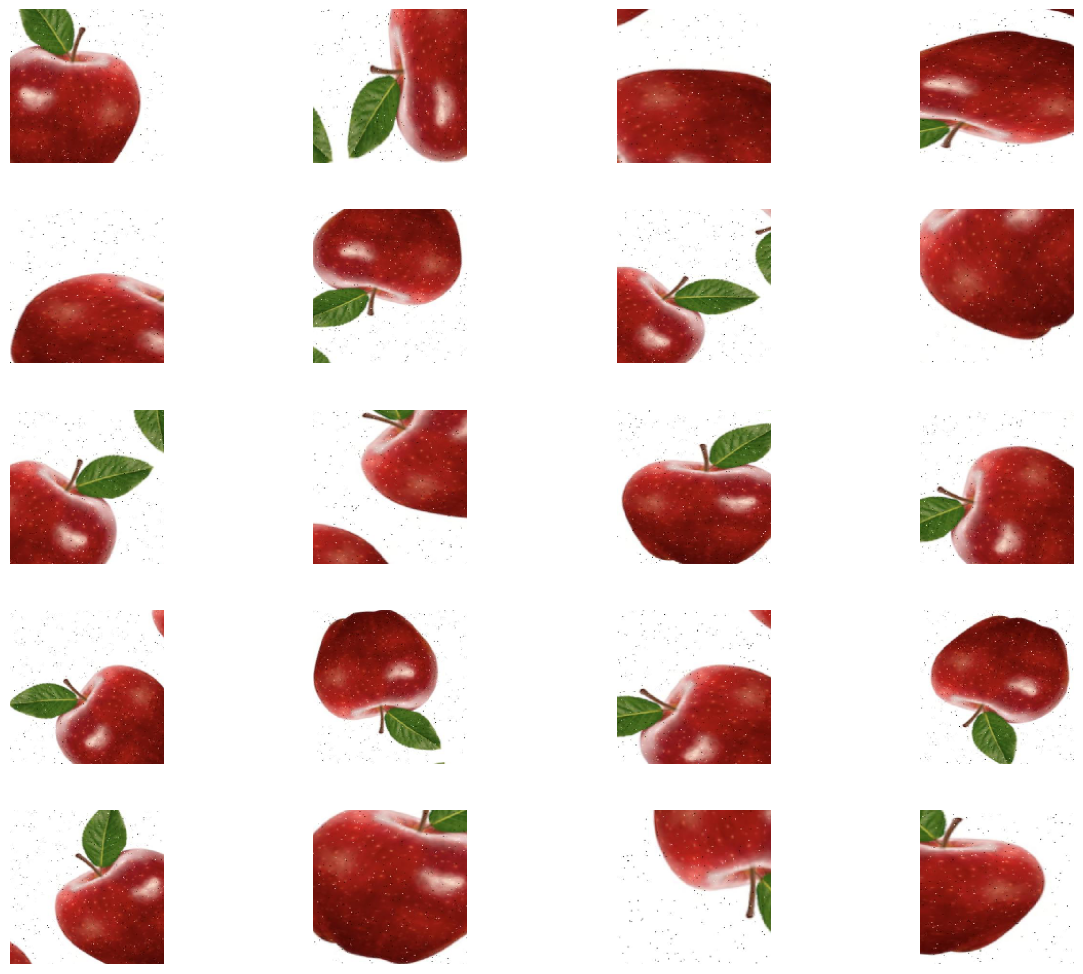

In [13]:
path_aug = os.path.join(train_fresh_dir, os.listdir(train_fresh_dir)[-1])
img_augmentation = Image.open(path_aug)
x_aug = np.array(img_augmentation)
x_aug = np.expand_dims(x_aug, axis=0)
desired_shape = (1, 183, 275, 3)
if np.prod(desired_shape) != np.prod(x_aug.shape):
    print("Error: Incompatible shapes!")
else:
    x_aug = np.reshape(x_aug, desired_shape)

# Code for image augmentation using generator

i = 0
for batch in train_datagen.flow(x_aug, batch_size=1, save_to_dir=preview_dir, save_prefix='fruit', save_format='jpeg'):
    i += 1
    if i >= 20:
        break

# Code for displaying augmented images

preview_img = os.listdir(preview_dir)

plt.figure(figsize=(15, 15))
for n in range(len(preview_img)):
    plt.subplot((len(preview_img)//4) + 1, 4, n+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image.load_img(os.path.join(preview_dir, preview_img[n]),
                              color_mode="rgb",
                              target_size=(150, 150)))
    plt.axis('off')
plt.show()

# Code for deleting the augmented images

for fn in preview_img:
    os.remove(os.path.join(preview_dir, fn))

###Melihat Actual Shape

In [14]:
print("Actual shape:", x_aug.shape)

Actual shape: (1, 374, 320, 3)


## Image Data Generator

In [15]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    # shuffle = False,
                                                    target_size=(150,150),
                                                    class_mode='binary')

validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         color_mode="rgb",
                                                         # shuffle = False,
                                                         target_size=(150,150),
                                                         class_mode='binary')

Found 10369 images belonging to 2 classes.
Found 5099 images belonging to 2 classes.


## Callbacks

In [16]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        if logs.get('accuracy') >= 0.93:
            print("\nReached 93% accuracy. Training stopped.")
            self.model.stop_training = True

callbacks = myCallback()

## Sequential Model (Baseline)

In [17]:
#if you want to use tranfer learning, skip this cell
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

## Transfer Learning

In [18]:
from tensorflow.keras.applications import Xception, VGG16, InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
import pandas as pd

In [19]:
####################### init pre_trained_model #################################

# pre_trained_model = InceptionV3(input_shape=(150,150,3),
#                                 include_top=False)

pre_trained_model = VGG16(input_shape=(150,150,3),
                          include_top=False)

# pre_trained_model = Xception(input_shape=(150,150,3),
#                              include_top=False)

# pre_trained_model.layers.pop()

####################### init pre_trained_model #################################

############################## freeze layer ####################################

for layer in pre_trained_model.layers:
    layer.trainable = False

# for layer in pre_trained_model.layers[:-4]:
#     layer.trainable = False

############################## freeze layer ####################################

############################## Flatten Layer ###################################

# last_output = pre_trained_model.layers[-1].output
# x = layers.Flatten()(last_output)

x = layers.Flatten()(pre_trained_model.output)

############################## Flatten Layer ###################################

######################### Fully Connected Layer ################################

x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

######################### Fully Connected Layer ################################

model = Model(pre_trained_model.input, x) 
model.compile(optimizer='adam', #RMSprop(lr=0.0001), adam
              loss='binary_crossentropy',
              metrics=['accuracy'])

pd.set_option('max_colwidth', None)
layers = [(layer, layer.name, layer.trainable) for layer in pre_trained_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

58889256/58889256 [==============================] - 0s 0us/step


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7ff24f4593f0>,input_1,False
1,<keras.layers.convolutional.conv2d.Conv2D object at 0x7ff24f45bd30>,block1_conv1,False
2,<keras.layers.convolutional.conv2d.Conv2D object at 0x7ff24f92e3b0>,block1_conv2,False
3,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7ff24f92e740>,block1_pool,False
4,<keras.layers.convolutional.conv2d.Conv2D object at 0x7ff24f3c7af0>,block2_conv1,False
5,<keras.layers.convolutional.conv2d.Conv2D object at 0x7ff24f01d540>,block2_conv2,False
6,<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7ff24f01e560>,block2_pool,False
7,<keras.layers.convolutional.conv2d.Conv2D object at 0x7ff24f01e3e0>,block3_conv1,False
8,<keras.layers.convolutional.conv2d.Conv2D object at 0x7ff24f01f4c0>,block3_conv2,False
9,<keras.layers.convolutional.conv2d.Conv2D object at 0x7ff24f01f850>,block3_conv3,False


In [20]:
train_len = 0
for foldername in os.listdir('/tmp/fruit-dataset/train'):
    train_len = train_len + len(os.listdir(os.path.join('/tmp/fruit-dataset/train',foldername)))
    
val_len = 0
for foldername in os.listdir('/tmp/fruit-dataset/val'):
    val_len = val_len + len(os.listdir(os.path.join('/tmp/fruit-dataset/val',foldername)))

print(train_len)
print(val_len)

10369
5099


In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_len // 32,
    epochs=10,
    verbose=1,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=val_len // 32
)

Epoch 1/10
324/324 [==============================] - 197s 569ms/step - loss: 0.4008 - accuracy: 0.8326 - val_loss: 0.2681 - val_accuracy: 0.8872
Epoch 2/10
324/324 [==============================] - 183s 566ms/step - loss: 0.2717 - accuracy: 0.8849 - val_loss: 0.2352 - val_accuracy: 0.9055
Epoch 3/10
324/324 [==============================] - 149s 461ms/step - loss: 0.2355 - accuracy: 0.9041 - val_loss: 0.2139 - val_accuracy: 0.9125
Epoch 4/10
324/324 [==============================] - 182s 562ms/step - loss: 0.2356 - accuracy: 0.9030 - val_loss: 0.1948 - val_accuracy: 0.9204
Epoch 5/10
324/324 [==============================] - 149s 459ms/step - loss: 0.2169 - accuracy: 0.9096 - val_loss: 0.1989 - val_accuracy: 0.9216
Epoch 6/10
324/324 [==============================] - 149s 459ms/step - loss: 0.1963 - accuracy: 0.9189 - val_loss: 0.1900 - val_accuracy: 0.9310
Epoch 7/10
324/324 [==============================] - 182s 564ms/step - loss: 0.1864 - accuracy: 0.9256 - val_loss: 0.2286 -

## Plot Loss and Accuracy

<Figure size 640x480 with 0 Axes>

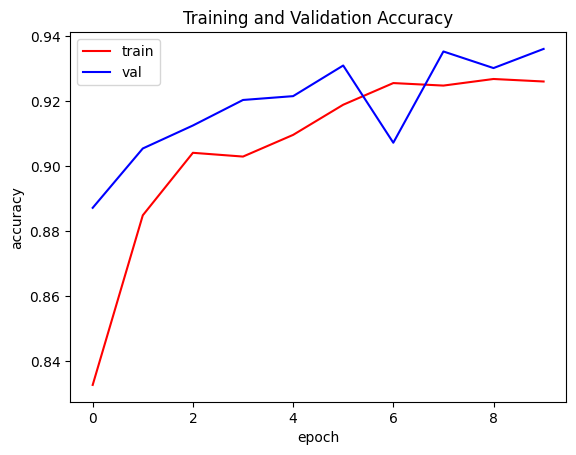

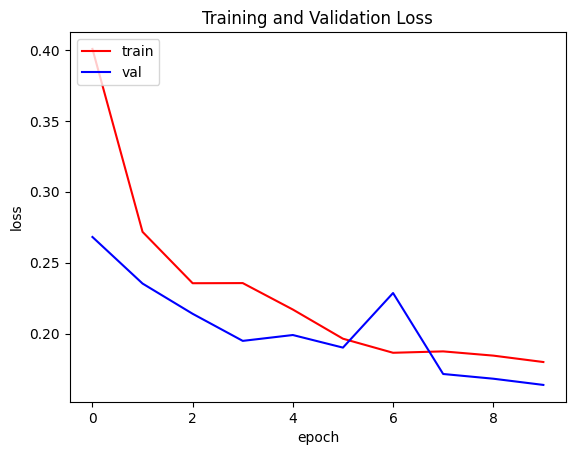

<Figure size 640x480 with 0 Axes>

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validation Loss')
plt.figure()

## Evaluate Model

In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                  target_size=(150, 150),
                                                  shuffle = False,
                                                  class_mode='binary')

filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 4004 images belonging to 2 classes.
4004/4004 [==============================] - 41s 10ms/step - loss: 0.1405 - accuracy: 0.9451
accuracy test:  0.9450549483299255
loss test:  0.14052222669124603


In [46]:
model.save('bugiene_modelv1.h5')

## Predict Image

Saving Jeruk.jpg to Jeruk.jpg
1/1 [==============================] - 0s 151ms/step


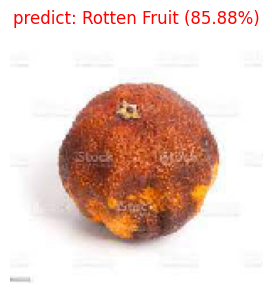

In [49]:
from keras.utils import get_file
import pathlib
import cv2

model_predict = tf.keras.models.load_model('/content/bugiene_modelv1.h5')
model_predict.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

uploaded = files.upload()
image_name = []
image_conf = []
predict_result = []

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, color_mode="rgb", target_size=(150, 150), interpolation="nearest")
  # imgplot = plt.imshow(img)
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  images = np.vstack([img])
  classes = model_predict.predict(images, batch_size=10)
  label = np.where(classes[0] > 0.5, 1,0)
  # print(label)
  if label == 0:
    image_name.append(fn)
    image_conf.append(1.0 - classes[0])
    predict_result.append('Fresh Fruit')
  else:
    image_name.append(fn)
    image_conf.append(classes[0])
    predict_result.append('Rotten Fruit')

plt.figure(figsize=(15, 15))
for n in range(len(image_name)):
  plt.subplot((len(image_name))+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(image_name[n], color_mode="rgb", target_size=(150, 150), interpolation="nearest"))
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"
  if predict_result[n] == 'Fresh Fruit':
    plt.title(title, color='green')
  else:
    plt.title(title, color='red')

  plt.axis('off')
plt.show()

for fn in image_name:
  os.system(f'rm {fn}')